In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
url = "https://github.com/YBIFoundation/Dataset/raw/main/Boston.csv"
df = pd.read_csv(url)

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [9]:
X = df.drop('MEDV', axis = 1)
y = df.MEDV

In [11]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [13]:
y_pred = model.predict(X_test)

In [15]:
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


In [16]:
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Absolute Error (MAE): 3.19
Mean Squared Error (MSE): 24.29
Root Mean Squared Error (RMSE): 4.93
R-squared (R²): 0.67


Actual vs Predicted Values

Text(0.5, 1.0, 'Actual vs Predicted MEDV')

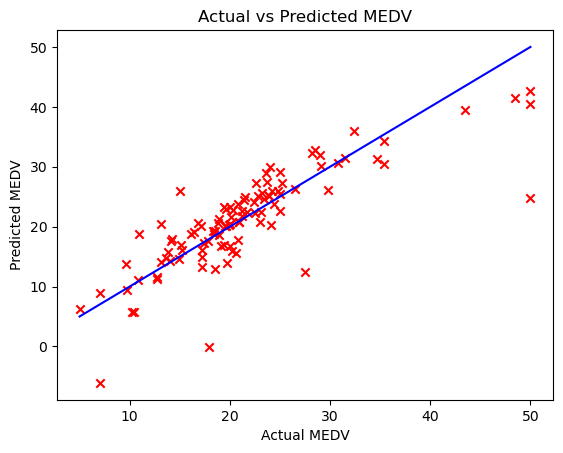

In [20]:
plt.scatter(y_test, y_pred, c='r', marker = 'x')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], c='b')
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Actual vs Predicted MEDV")

Multiple Featured Regression

In [21]:
features = X.columns
n_features = len(features)

Create subplots to show actual vs predicted for each feature(optional)

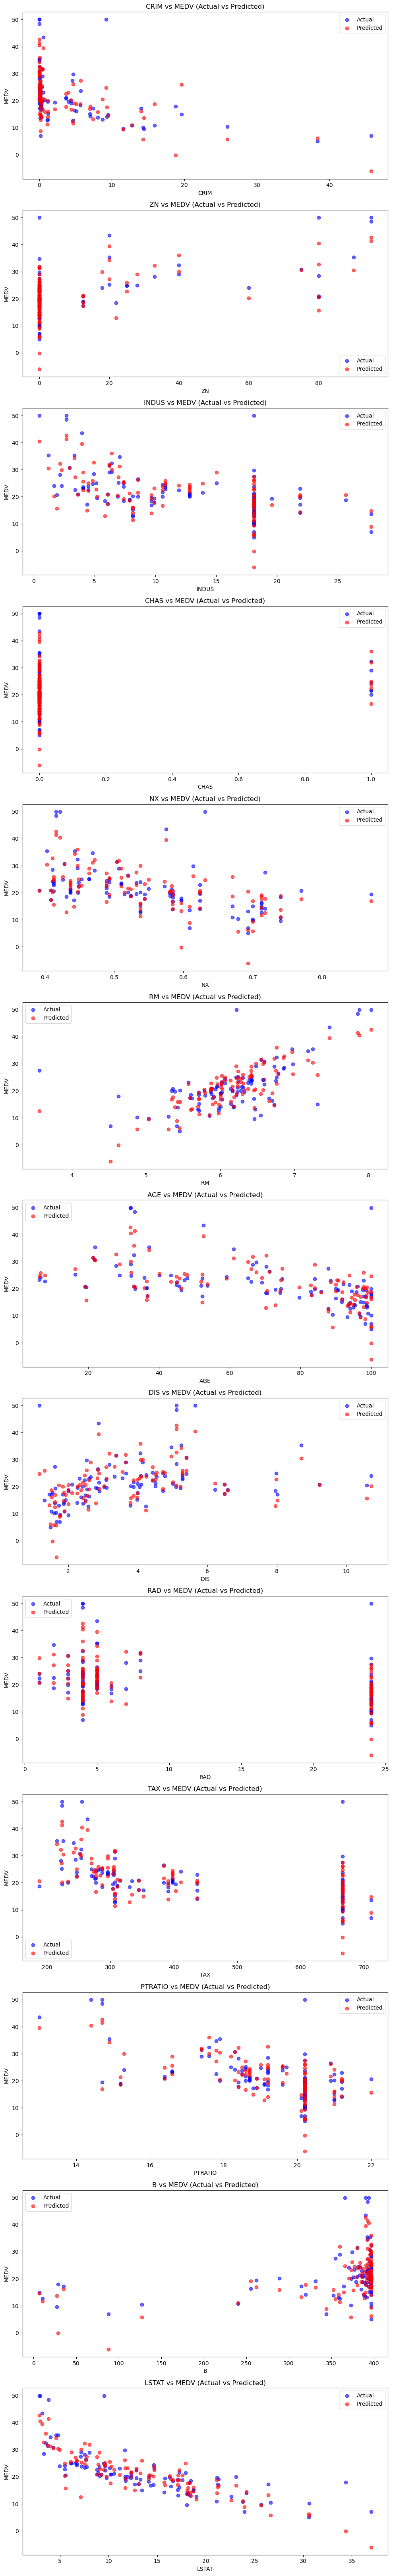

In [24]:
fig, axes = plt.subplots(n_features, 1, figsize=(10, 5 * n_features))

for i, feature in enumerate(features):
    ax = axes[i]
    ax.scatter(X_test[feature], y_test, color='blue', alpha=0.6, label='Actual')
    ax.scatter(X_test[feature], y_pred, color='red', alpha=0.6, label='Predicted')
    ax.set_title(f'{feature} vs MEDV (Actual vs Predicted)')
    ax.set_xlabel(feature)
    ax.set_ylabel('MEDV')
    ax.legend()

plt.tight_layout()
plt.show()

Get Model Coefficients (Weights) for each feature

In [25]:
coefficients = model.coef_

Create a DataFrame with feature names and their corresponding coefficients

In [27]:
feature_weights = pd.DataFrame({
    'Feature': X.columns,
    'Weight (Coefficient)': coefficients
})

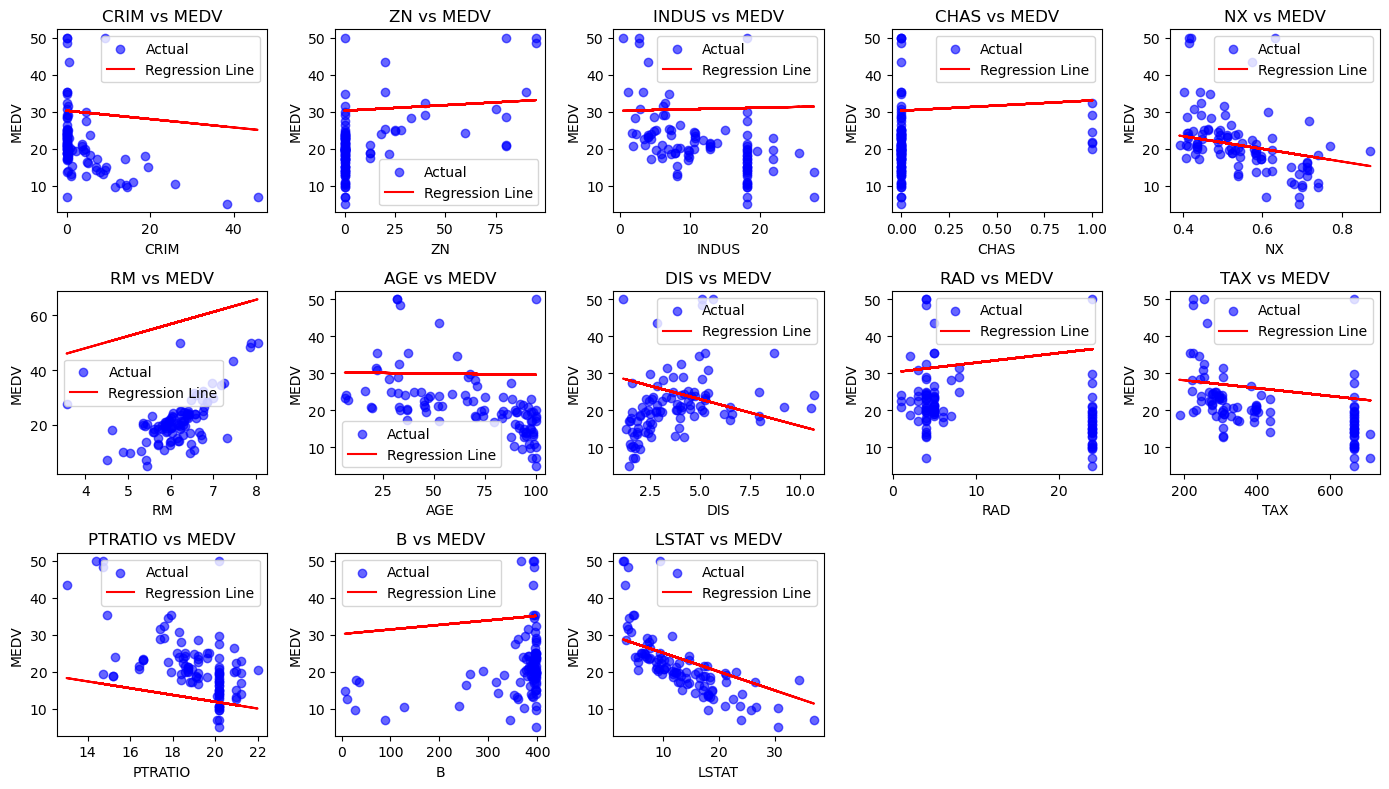

In [29]:
plt.figure(figsize=(14, 8))
for i, feature in enumerate(X.columns):
    plt.subplot(3, 5, i+1)  # Create subplots (3 rows, 5 columns)
    plt.scatter(X_test[feature], y_test, color='blue', label='Actual', alpha=0.6)
    plt.plot(X_test[feature], model.intercept_ + model.coef_[i] * X_test[feature], color='red', label='Regression Line')
    plt.xlabel(feature)
    plt.ylabel('MEDV')
    plt.title(f'{feature} vs MEDV')
    plt.legend()

plt.tight_layout()
plt.show()